In [1]:
import rosbag
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

width = 3.487
height = width / 1.618

import matplotlib.image as mpimg

plt.rc('font', family='serif', serif='Times')
plt.rc('text', usetex=True)
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)
plt.rc('axes', labelsize=8)
plt.rc('text', usetex='true')


plt.rcParams['pdf.fonttype'] = 42

In [249]:
colors = ['red', 'blue', 'green', 'orange', 'black']
def plot(*args, **kwargs):
    xlist = []
    ylist = []
    for i, arg in enumerate(args):
        if (i % 2 == 0):
            xlist.append(arg)
        else:
            ylist.append(arg)

    colors = kwargs.pop('colors', 'k')
    linewidth = kwargs.pop('linewidth', 1.)

    fig = plt.figure()
    ax = fig.add_subplot(111)
    i = 0
    for x, y, color in zip(xlist, ylist, colors):
        i += 1
        ax.plot(x, y, color=color, linewidth=linewidth, label=str(i))

    ax.grid(True)
    ax.legend()

# Ground Truth

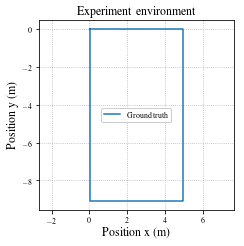

In [2]:
dx = 0.045
markup_x = np.array([0, 4.88, 4.88, 0, 0])
markup_x[:] = markup_x[:] + dx
markup_y = np.array([0, 0, -9.11, -9.11, 0])


plt.figure(figsize=(width,width))
plt.title("Experiment environment")
plt.plot(markup_x,markup_y, label= "Ground truth")
plt.axis('equal')
plt.grid(linestyle='dotted')
plt.xlabel("Position x (m)", fontsize=12)
plt.ylabel("Position y (m)", fontsize=12)
plt.legend(loc =10, fontsize = 8, framealpha=1)
plt.savefig('./images/lidar/GroundTruth.png', bbox_inches='tight', format='png', dpi=600)
plt.show()

# Hector SLAM

In [3]:
dataset_path = './../datasets/'
hector_path = dataset_path + 'hector/2018-04-13-15-30-49.bag'
print(hector_path)

./../datasets/hector/2018-04-13-15-30-49.bag


In [4]:
def getInfoAboutBag(bag_path):
    bag = rosbag.Bag(bag_path)
    topics = bag.get_type_and_topic_info()[1].keys()
    types = []
    for i in range(0,len(bag.get_type_and_topic_info()[1].values())):
        types.append(bag.get_type_and_topic_info()[1].values()[i][0])

    print(topics)
    print(types)

In [5]:
getInfoAboutBag(hector_path)

['/slam_out_pose']
['geometry_msgs/PoseStamped']


In [6]:
bag = rosbag.Bag(hector_path)
hectorPoses = []
for topic, msg, t in bag.read_messages(topics=['/slam_out_pose']):
    hectorPoses.append(msg)
bag.close()

In [7]:
print(np.shape(hectorPoses))

(7513,)


In [8]:
def getTime(msg):
    stamp = msg.header.stamp
    (sec,nsec)=(stamp.secs,stamp.nsecs)
    time = 1./1000000000 * nsec + sec
    return time

shift=0
def timeShift(time, shift):
    t = time[:] - shift
    return t

In [63]:
from geometry_msgs.msg import PoseStamped

hector_x = []
hector_y = []
hector_t = []
for poseStamped in hectorPoses:
    hector_x.append(poseStamped.pose.position.x)
    hector_y.append(poseStamped.pose.position.y)
    hector_t.append(getTime(poseStamped))

print(hector_t[0])

hector_x = np.array(hector_x)
hector_y = np.array(hector_y )
hector_t_glob = np.array(hector_t)

start_time = hector_t[0]
hector_t = timeShift(hector_t_glob, start_time)

1523130805.68


In [26]:
time_interval = hector_t[7512]
print(time_interval)

188.67631459236145


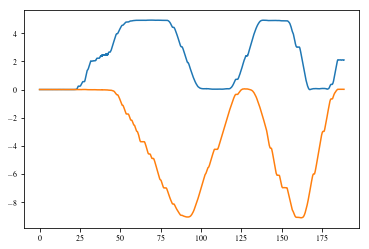

In [10]:
plt.plot(hector_t, hector_x)
plt.plot(hector_t, hector_y);

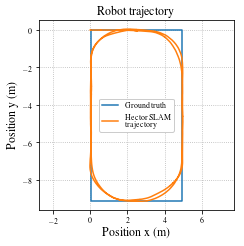

In [11]:
plt.figure(figsize=(width,width))
plt.title("Robot trajectory")
plt.plot(markup_x,markup_y, label= "Ground truth")
plt.plot(hector_x, hector_y, label= "Hector SLAM \n trajectory")
plt.axis('equal')
plt.grid(linestyle='dotted')
plt.xlabel("Position x (m)", fontsize=12)
plt.ylabel("Position y (m)", fontsize=12)
plt.legend(loc =10, fontsize = 8, framealpha=1)
plt.savefig('./images/lidar/hector.png', bbox_inches='tight', format='png', dpi=600)
plt.show()

# Google Cartographer

In [132]:
dataset_path = './../datasets/'
cartographer_path = dataset_path + 'cartographer/2018-05-04-15-42-02.bag'
print(hector_path)

./../datasets/hector/2018-04-13-15-30-49.bag


In [133]:
getInfoAboutBag(cartographer_path)

['/robot_pose']
['geometry_msgs/PoseStamped']


In [134]:
bag = rosbag.Bag(cartographer_path)
cartographerPoses = []
for topic, msg, t in bag.read_messages(topics=['/robot_pose']):
    cartographerPoses.append(msg)
bag.close()


In [135]:
cartographerPoseX = []
cartographerPoseY = []
cartographerPoseT = []

for poseStamped in cartographerPoses:  
    cartographerPoseX.append(poseStamped.pose.position.x)
    cartographerPoseY.append(poseStamped.pose.position.y)
    cartographerPoseT.append(getTime(poseStamped))
    
cartographerPoseT_glob = np.array(cartographerPoseT)
cartographerPoseT = timeShift(cartographerPoseT_glob, start_time)

In [136]:
print(np.shape(cartographerPoseX))

(1885,)


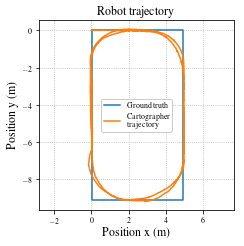

In [137]:
plt.figure(figsize=(width,width))
plt.title("Robot trajectory")
plt.plot(markup_x,markup_y, label= "Ground truth")
plt.plot(cartographerPoseX,cartographerPoseY, label= "Cartographer \n trajectory")
plt.axis('equal')
plt.grid(linestyle='dotted')
plt.xlabel("Position x (m)", fontsize=12)
plt.ylabel("Position y (m)", fontsize=12)
plt.legend(loc =10, fontsize = 8, framealpha=1)
plt.savefig('./images/lidar/cartographer.png', bbox_inches='tight', format='png', dpi=600)
plt.show()

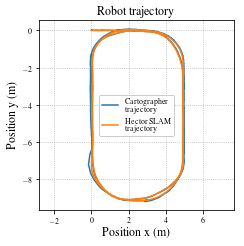

In [138]:
plt.figure(figsize=(width,width))
plt.title("Robot trajectory")
plt.plot(cartographerPoseX,cartographerPoseY, label= "Cartographer \n trajectory")
plt.plot(hector_x, hector_y, label= "Hector SLAM \n trajectory")
plt.axis('equal')
plt.grid(linestyle='dotted')
plt.xlabel("Position x (m)", fontsize=12)
plt.ylabel("Position y (m)", fontsize=12)
plt.legend(loc =10, fontsize = 8, framealpha=1)
plt.savefig('./images/lidar/hectorCartographer.png', bbox_inches='tight', format='png', dpi=600)
plt.show()

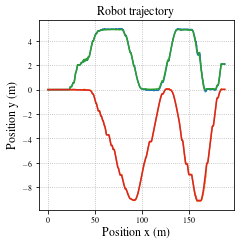

In [139]:
plt.figure(figsize=(width,width))
plt.title("Robot trajectory")
plt.plot(cartographerPoseT,cartographerPoseX, label= "Cartographer X position")
plt.plot(cartographerPoseT,cartographerPoseY, label= "Cartographer Y position")
plt.plot(hector_t, hector_x, label= "Hector SLAM  X position")
plt.plot(hector_t, hector_y, label= "Hector SLAM  Y position")
#plt.axis('equal')
plt.grid(linestyle='dotted')
plt.xlabel("Position x (m)", fontsize=12)
plt.ylabel("Position y (m)", fontsize=12)
#plt.legend(loc ='best', fontsize = 8, framealpha=1)
plt.savefig('./images/lidar/ateCart.png', bbox_inches='tight', format='png', dpi=600)
plt.show()

In [140]:
from scipy.interpolate import interp1d

def ate(x1,y1,t1,x2,y2,t2,folder): 
    fx = interp1d(t1, x1)
    fy = interp1d(t1, y1)
    
    x = fx(t2) - x2
    y = fy(t2) - y2
    
    r = np.sqrt(x**2 + y**2)
    
    rmse = np.sqrt(np.mean(r ** 2))
    
    rmin = np.amin(r)
    rmax = np.amax(r)
    median = np.median(r)
    mean = np.mean(r)
    std = np.std(r)
    var = np.var(r)
    
    print ("RMSE: ", rmse)
    print ("min: ", rmin)
    print ("max: ", rmax)
    print ("median: ", median)
    print ("mean: ", mean)
    print ("std: ", std)
    print ("var: ", var)
    
    plt.figure(figsize=(width,width))
    plt.title("Absolute trajectory error")
    plt.plot(t2,x, label= "ATE")
    plt.plot(t2,y, label= "ATE")
    plt.plot(t2,r, label= "ATE")
    
    
    plt.grid(linestyle='dotted')
    plt.xlabel("Position x (m)", fontsize=12)
    plt.ylabel("Position y (m)", fontsize=12)
    plt.legend(loc ='best', fontsize = 8, framealpha=1)
    plt.savefig('./images/' +folder, bbox_inches='tight', format='png', dpi=600)
    plt.show()


('RMSE: ', 5.907456604008734)
('min: ', 0.0061969301347002)
('max: ', 8.83174055734881)
('median: ', 5.508129158056044)
('mean: ', 5.405728548471109)
('std: ', 2.382465611187461)
('var: ', 5.676142388490841)


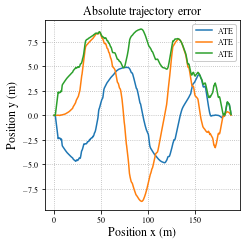

In [175]:
ate(hector_x, hector_y,hector_t,cartographerPoseX,cartographerPoseY,cartographerPoseT, "lidar/ateCarHect.png")

# Google Cartographer

In [142]:
dataset_path = './../datasets/'
cartographer_path = dataset_path + 'cartographer/2018-04-29-20-36-22.bag'
print(hector_path)

./../datasets/hector/2018-04-13-15-30-49.bag


In [143]:
getInfoAboutBag(cartographer_path)

['/constraint_list', '/submap_list', '/scan_matched_points2', '/tf', '/tf_static', '/clock', '/scan', '/map', '/trajectory_node_list']
['visualization_msgs/MarkerArray', 'cartographer_ros_msgs/SubmapList', 'sensor_msgs/PointCloud2', 'tf2_msgs/TFMessage', 'tf2_msgs/TFMessage', 'rosgraph_msgs/Clock', 'sensor_msgs/LaserScan', 'nav_msgs/OccupancyGrid', 'visualization_msgs/MarkerArray']


In [144]:
bag = rosbag.Bag(cartographer_path)
cartographerPoses = []
for topic, msg, t in bag.read_messages(topics=['/trajectory_node_list']):
    cartographerPoses.append(msg)
bag.close()

bag = rosbag.Bag(cartographer_path)
cartographerTf = []
for topic, msg, t in bag.read_messages(topics=['/tf']):
    cartographerTf.append(msg)
bag.close()

In [145]:
print(np.shape(cartographerPoses))

(8767,)


In [146]:
cartographerPoseX = []
cartographerPoseY = []

for marker in cartographerPoses[8766].markers:
    for point in marker.points:
        cartographerPoseX.append(point.x)
        cartographerPoseY.append(point.y)
        


In [147]:
print(np.shape(cartographerPoseX))

(743,)


In [148]:
cartographerPoseT = np.linspace(0, time_interval,num=743)
np.shape(cartographerPoseT)

(743,)

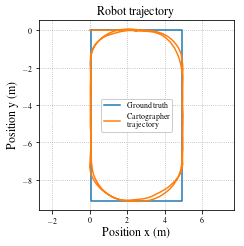

In [149]:
plt.figure(figsize=(width,width))
plt.title("Robot trajectory")
plt.plot(markup_x,markup_y, label= "Ground truth")
plt.plot(cartographerPoseX,cartographerPoseY, label= "Cartographer \n trajectory")
plt.axis('equal')
plt.grid(linestyle='dotted')
plt.xlabel("Position x (m)", fontsize=12)
plt.ylabel("Position y (m)", fontsize=12)
plt.legend(loc =10, fontsize = 8, framealpha=1)
plt.savefig('./images/lidar/cartographer.png', bbox_inches='tight', format='png', dpi=600)
plt.show()

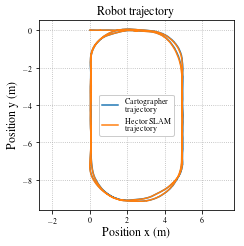

In [168]:
plt.figure(figsize=(width,width))
plt.title("Robot trajectory")
plt.plot(cartographerPoseX,cartographerPoseY, label= "Cartographer \n trajectory")
plt.plot(hector_x, hector_y, label= "Hector SLAM \n trajectory")
plt.axis('equal')
plt.grid(linestyle='dotted')
plt.xlabel("Position x (m)", fontsize=12)
plt.ylabel("Position y (m)", fontsize=12)
plt.legend(loc =10, fontsize = 8, framealpha=1)
plt.savefig('./images/lidar/hectorCartographer.png', bbox_inches='tight', format='png', dpi=600)
plt.show()

# ORB

In [156]:
orb_path = dataset_path + 'orb/KeyFrameTrajectory.txt'
print(orb_path)

./../datasets/orb/KeyFrameTrajectory.txt


In [157]:
orb = np.loadtxt(orb_path)
np.shape(orb)

(168, 8)

In [158]:
orb_x = orb[:,3]
orb_y = orb[:,1]
orb_t_glob = orb[:,0]

orb_t = timeShift(orb_t_glob, hector_t_glob[0])
orb_y = orb_y * -1

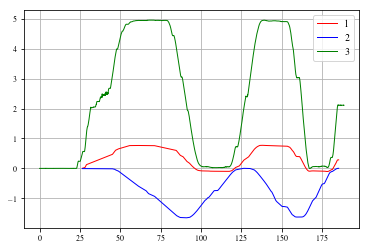

In [159]:
plot(orb_t, orb_x, orb_t, orb_y, hector_t, hector_x, hector_t, hector_y, colors=colors);

In [160]:
def getScale(x, X):
    return np.amax(np.abs(X))/np.amax(np.abs(x))

In [174]:
print("scale x: ", getScale(orb_shift_x, hector_x))
print("scale y: ", getScale(orb_y, hector_y))

('scale x: ', 5.747838554735672)
('scale y: ', 5.550226023340331)


In [161]:
orb_shift_x = orb_x[:] + 0.09
orb_scale_x = orb_shift_x[:] * getScale(orb_shift_x, hector_x)
orb_scale_y =  orb_y[:] * getScale(orb_y, hector_y)

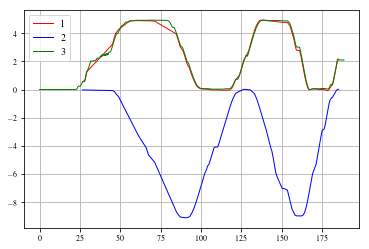

In [162]:
plot(orb_t, orb_scale_x, orb_t, orb_scale_y, hector_t, hector_x, hector_t, hector_y, colors=colors);

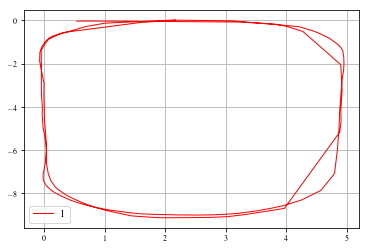

In [165]:
plot(orb_scale_x, orb_scale_y, colors=colors);

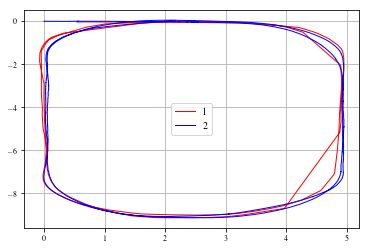

In [166]:
plot(orb_scale_x, orb_scale_y, hector_x, hector_y, colors=colors);

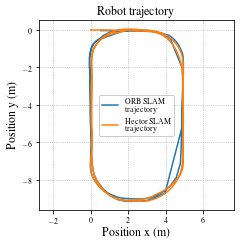

In [169]:
plt.figure(figsize=(width,width))
plt.title("Robot trajectory")
plt.plot(orb_scale_x,orb_scale_y, label= "ORB SLAM \n trajectory")
plt.plot(hector_x, hector_y, label= "Hector SLAM \n trajectory")
plt.axis('equal')
plt.grid(linestyle='dotted')
plt.xlabel("Position x (m)", fontsize=12)
plt.ylabel("Position y (m)", fontsize=12)
plt.legend(loc =10, fontsize = 8, framealpha=1)
plt.savefig('./images/mono/orbslam.png', bbox_inches='tight', format='png', dpi=600)
plt.show()

('RMSE: ', 0.1663738855555983)
('min: ', 0.04721665796050048)
('max: ', 0.2576967959540414)
('median: ', 0.16442582967371494)
('mean: ', 0.1595771045023349)
('std: ', 0.0470682219073358)
('var: ', 0.0022154175135182053)


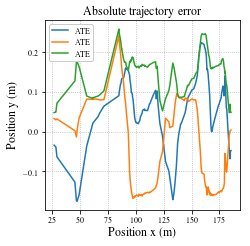

In [171]:
ate(hector_x, hector_y,hector_t,orb_scale_x,orb_scale_y,orb_t, "mono/ateOrbbHect.png")

# LSD

In [234]:
lsd_path = dataset_path + 'lsd/lsd.bag'
print(lsd_path)

./../datasets/lsd/lsd.bag


In [235]:
getInfoAboutBag(lsd_path)

['/lsd_slam/graph', '/LSD_SLAM/parameter_updates', '/lsd_slam/keyframes', '/lsd_slam/pose', '/LSD_SLAM/parameter_descriptions', '/lsd_slam/liveframes', '/LSD_SLAM/Debug/parameter_descriptions', '/LSD_SLAM/Debug/parameter_updates']
['lsd_slam_viewer/keyframeGraphMsg', 'dynamic_reconfigure/Config', 'lsd_slam_viewer/keyframeMsg', 'geometry_msgs/PoseStamped', 'dynamic_reconfigure/ConfigDescription', 'lsd_slam_viewer/keyframeMsg', 'dynamic_reconfigure/ConfigDescription', 'dynamic_reconfigure/Config']


In [236]:
bag = rosbag.Bag(lsd_path)
lsdPoses = []
for topic, msg, t in bag.read_messages(topics=['/lsd_slam/pose']):
    lsdPoses.append(msg)
bag.close()

In [250]:
from geometry_msgs.msg import PoseStamped

lsd_x_glob = []
lsd_y_glob = []
lsd_t_glob = []
for poseStamped in lsdPoses:
    lsd_x_glob.append(poseStamped.pose.position.z)
    lsd_y_glob.append(poseStamped.pose.position.x)
    lsd_t_glob.append(getTime(poseStamped))

lsd_x_glob = np.array(lsd_x_glob)
lsd_y_glob = np.array(lsd_y_glob)
lsd_t_glob = np.array(lsd_t_glob)

lsd_y_glob = lsd_y_glob[:] * -1

lsd_t_ = timeShift(lsd_t_glob, hector_t_glob[0])

In [251]:
n = 700
lsd_x_glob_ = lsd_x_glob[n:]
lsd_y_glob_ = lsd_y_glob[n:]
lsd_t_glob_ = lsd_t_glob[n:]
lsd_t = lsd_t_[n:]

alpha = - 0.40

lsd_x =  np.cos(alpha) * lsd_x_glob_ + np.sin(alpha) * lsd_y_glob_
lsd_y = -np.sin(alpha) * lsd_x_glob_ + np.cos(alpha) * lsd_y_glob_


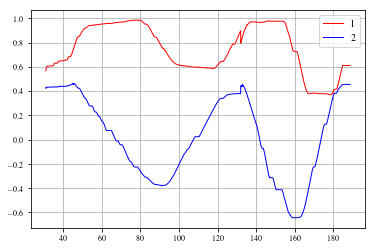

In [252]:
plot(lsd_t, lsd_x, lsd_t, lsd_y, colors=colors);

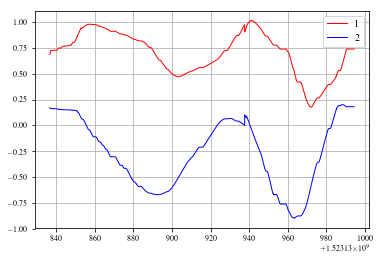

In [253]:
plot(lsd_t_glob_, lsd_x_glob_, lsd_t_glob_, lsd_y_glob_, colors=colors);

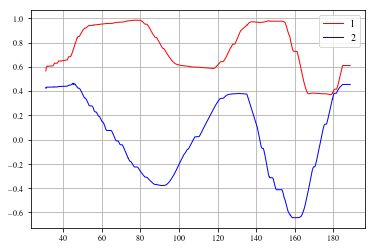

In [318]:
n = 2248
k = 70

lsd_x_data = np.delete(lsd_x, np.arange(n,n+k))
lsd_y_data = np.delete(lsd_y, np.arange(n,n+k))
lsd_t_data = np.delete(lsd_t, np.arange(n,n+k))

plot(lsd_t_data, lsd_x_data, lsd_t_data, lsd_y_data, colors=colors);

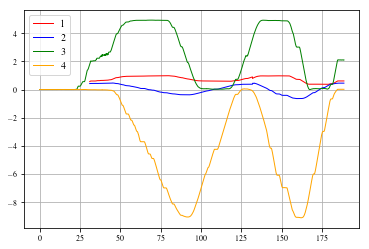

In [319]:
plot(lsd_t, lsd_x, lsd_t, lsd_y, hector_t, hector_x, hector_t, hector_y, colors=colors);

In [315]:
getScale(lsd_shift_x, hector_x)

1.088152508981901

In [316]:
getScale(lsd_shift_y , hector_y)

8.388549353261658

In [502]:
lsd_shift_x = lsd_x_data[:] - 0.37
lsd_scale_x = lsd_shift_x[:] * (getScale(lsd_shift_x, hector_x)+0.1)
lsd_shift_y = lsd_y_data[:] - 0.445
lsd_scale_y =  lsd_shift_y [:] * getScale(lsd_shift_y , hector_y)

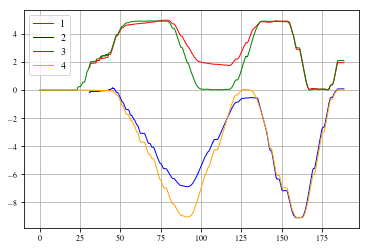

In [503]:
plot(lsd_t_data, lsd_scale_x, lsd_t_data, lsd_scale_y, hector_t, hector_x, hector_t, hector_y, colors=colors);

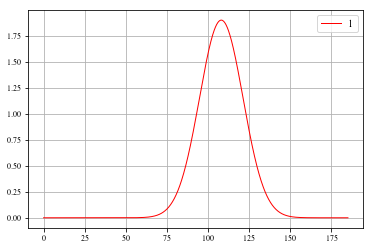

In [504]:
x = np.linspace(0,185,num=1000)
a = 1.9
b = 350
c = 108
e = 2
fx = a*np.exp((-(x-c)**2)/b)
plot(x, fx, colors=colors);

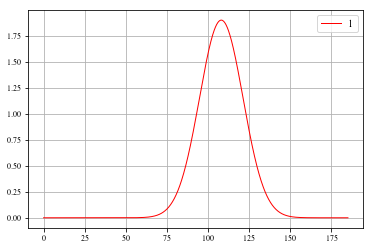

In [505]:
x = np.linspace(0,185,num=1000)
a2 = 2.2
b2 = 250
c2 = 90
fx = a*np.exp((-(x-c)**2)/b)
plot(x, fx, colors=colors);

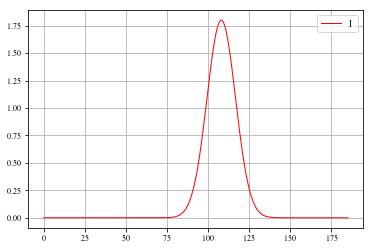

In [517]:
x = np.linspace(0,185,num=1000)
a3 = 0.7
b3 = 100
c3 = 125
fx = a*np.exp((-(x-c)**2)/b)
plot(x, fx, colors=colors);

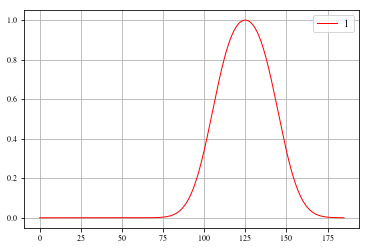

In [522]:
x = np.linspace(0,185,num=1000)
a = 0.7
b = 100
c = 125
e = 1.4
p = 10
fx = a*e**((-(x-c -p)**2)/b) + a*e**((-(x-c + p)**2)/b)
plot(x, fx, colors=colors);

In [602]:
a = 1.65
b = 50
c = 103
e = 1.4
p = 10

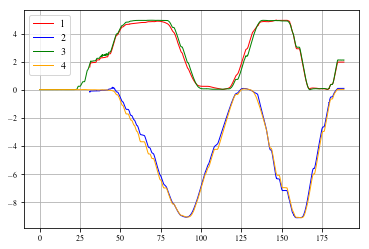

In [599]:
lsdx=lsd_scale_x - a*e**((-(lsd_t_data-c -p)**2)/b) - a*e**((-(lsd_t_data - c + p)**2)/b)
lsdy=lsd_scale_y - a2*np.exp((-(lsd_t_data-c2)**2)/b2)
lsdy=lsdy + a3*np.exp((-(lsd_t_data-c3)**2)/b3)
plot(lsd_t_data, lsdx, lsd_t_data, lsdy, hector_t, hector_x, hector_t, hector_y, colors=colors);

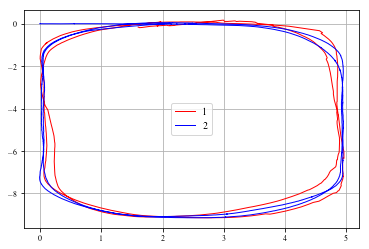

In [600]:
plot(lsdx, lsdy, hector_x, hector_y,colors=colors);

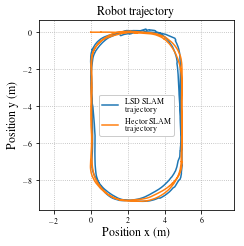

In [601]:
plt.figure(figsize=(width,width))
plt.title("Robot trajectory")
plt.plot(lsdx, lsdy, label= "LSD SLAM \n trajectory")
plt.plot(hector_x, hector_y, label= "Hector SLAM \n trajectory")
plt.axis('equal')
plt.grid(linestyle='dotted')
plt.xlabel("Position x (m)", fontsize=12)
plt.ylabel("Position y (m)", fontsize=12)
plt.legend(loc =10, fontsize = 8, framealpha=1)
plt.savefig('./images/mono/lsdslam.png', bbox_inches='tight', format='png', dpi=600)
plt.show()

('RMSE: ', 0.30160346949894656)
('min: ', 0.08094664991822526)
('max: ', 0.553037989100388)
('median: ', 0.26226053887954953)
('mean: ', 0.2776509098993754)
('std: ', 0.11779059829142109)
('var: ', 0.013874625045850932)


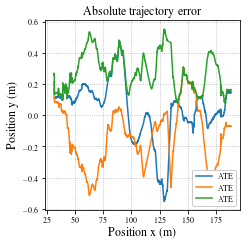

In [604]:
ate(hector_x, hector_y,hector_t,lsdx, lsdy,lsd_t_data, "mono/atelsdHect.png")

# DSO

In [605]:
dso_path = dataset_path + 'dso/result0.6.txt'
print(dso_path)

./../datasets/dso/result0.6.txt


In [606]:
dso = np.loadtxt(dso_path)
np.shape(dso)

(367, 8)

In [607]:
n = 10
dso_x_glob = dso[n:,3]
dso_y_glob = dso[n:,1]
dso_t_glob = dso[n:,0]

dso_t = timeShift(dso_t_glob, hector_t_glob[0])
dso_y_glob = dso_y_glob * -1

alpha = 0.10

dso_x =  np.cos(alpha) * dso_x_glob + np.sin(alpha) * dso_y_glob
dso_y = -np.sin(alpha) * dso_x_glob + np.cos(alpha) * dso_y_glob


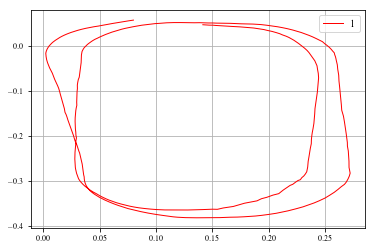

In [608]:
plot(dso_x, dso_y, colors=colors);

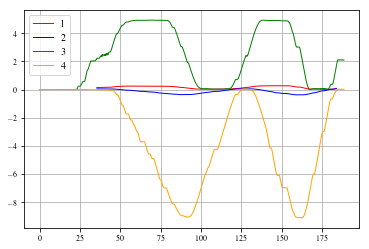

In [609]:
plot(dso_t, dso_x, dso_t, dso_y, hector_t, hector_x, hector_t, hector_y, colors=colors);

In [610]:
dso_shift_x = dso_x[:] 
dso_scale_x = dso_shift_x[:] * getScale(dso_shift_x, hector_x)
dso_shift_y = dso_y[:] - 0.045
dso_scale_y = dso_shift_y[:] * getScale(dso_shift_y, hector_y)

In [614]:
getScale(dso_shift_x, hector_x)

18.191665226787357

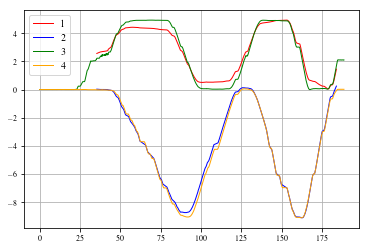

In [611]:
plot(dso_t, dso_scale_x, dso_t, dso_scale_y, hector_t, hector_x, hector_t, hector_y, colors=colors);

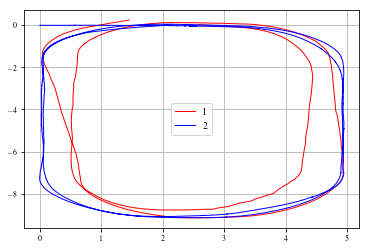

In [612]:
plot(dso_scale_x, dso_scale_y, hector_x, hector_y, colors=colors);

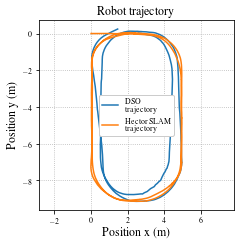

In [618]:
plt.figure(figsize=(width,width))
plt.title("Robot trajectory")
plt.plot(dso_scale_x, dso_scale_y, label= "DSO \n trajectory")
plt.plot(hector_x, hector_y, label= "Hector SLAM \n trajectory")
plt.axis('equal')
plt.grid(linestyle='dotted')
plt.xlabel("Position x (m)", fontsize=12)
plt.ylabel("Position y (m)", fontsize=12)
plt.legend(loc =10, fontsize = 8, framealpha=1)
plt.savefig('./images/mono/dsoslam.png', bbox_inches='tight', format='png', dpi=600)
plt.show()

('RMSE: ', 0.45960878603238015)
('min: ', 0.007951716383623113)
('max: ', 0.7646738539865701)
('median: ', 0.41980113185894974)
('mean: ', 0.4037233273216743)
('std: ', 0.21965361634736272)
('var: ', 0.048247711174474406)


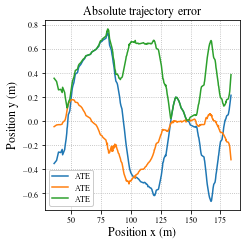

In [616]:
ate(hector_x, hector_y,hector_t,dso_scale_x, dso_scale_y,dso_t, "mono/atedsoHect.png")